In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df=pd.read_csv('titanic_train.csv')

In [58]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [60]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


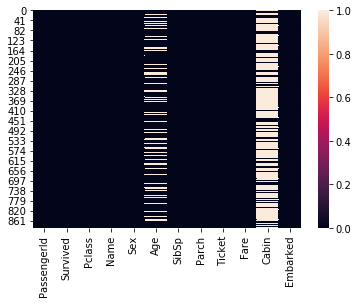

In [61]:
sns.heatmap(df.isnull())

In [62]:
#Try to fix missing age data
def Age_calc(cls):
    age=cls[0]
    pclass=cls[1]
    if pd.isnull(age):
        if pclass=='1':
            return 38
        elif pclass=='2':
            return 29
        else:
            return 23
    else:
        return age
df['Age']=df[['Age','Pclass']].apply(Age_calc,axis=1)    

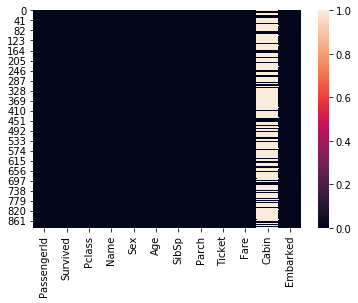

In [63]:
#Missing age data is fixed now
sns.heatmap(df.isnull())

In [64]:
#Removing Cabin column as too much of missing data
df.drop('Cabin',axis=1,inplace=True)

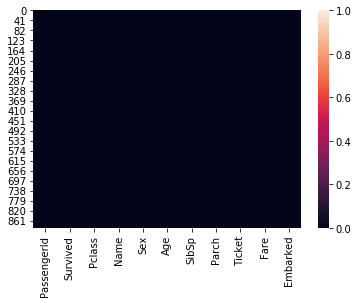

In [65]:
sns.heatmap(df.isnull())

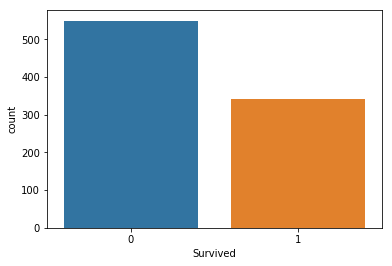

In [66]:
#Comparing the overall survivability of the passengers
sns.countplot(x='Survived',data=df)

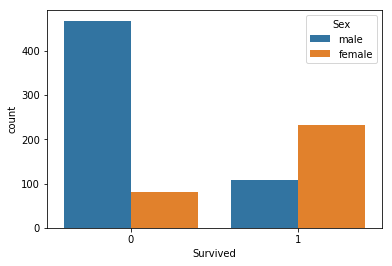

In [67]:
#Comparing the survival rate of the 2 sex
sns.countplot(x='Survived',hue='Sex',data=df)

In [68]:
#We can see that more female passengers survived compared to their male counterparts

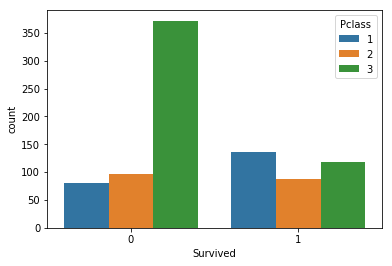

In [69]:
#Class wise survivability of the passengers
sns.countplot(x='Survived',hue='Pclass',data=df)

In [70]:
#Passengers who did not survive belong more likely to the 3rd class

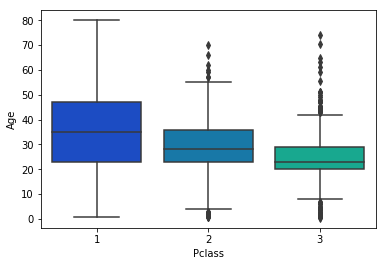

In [71]:
#Trying to gauge the survivability based on the Class of the passengers
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

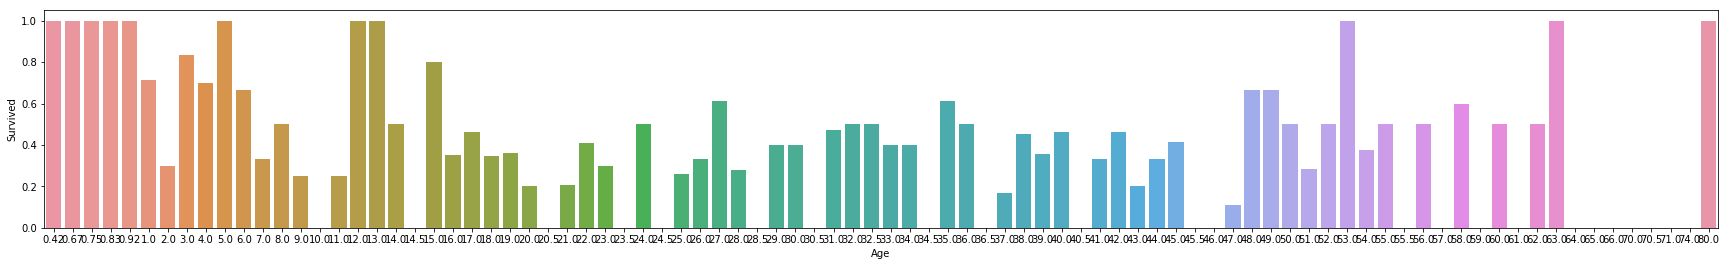

In [72]:
#Age wise plot of the entire passenger list
fig, axis = plt.subplots(1,1,figsize=(30,4))
average_age = df[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

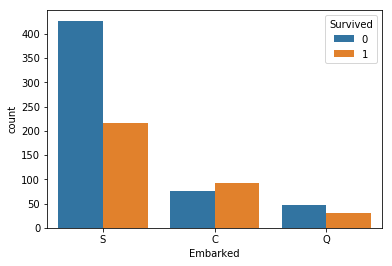

In [73]:
#Survivabilty of passengers based on their embarkment points
sns.countplot(x='Embarked',hue='Survived',data=df)

In [74]:
#The Survial rate is most for Cherbourg. WHY ??

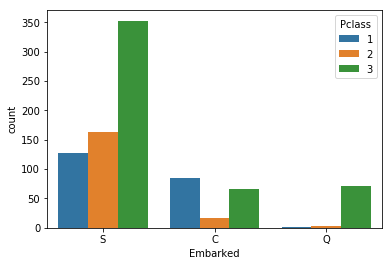

In [75]:
#Survivabilty of passengers based pn their embarkment points
sns.countplot(x='Embarked',hue='Pclass',data=df)

In [76]:
#From the above visualization, we note that Southampton has more than double the Class 3 passengers combined from Queenstown 
#and Cherbourg. While Cherbourg has about half of the Class1 passengers and  less class 3 passengers, hence the percentage of surviviors is highest there.

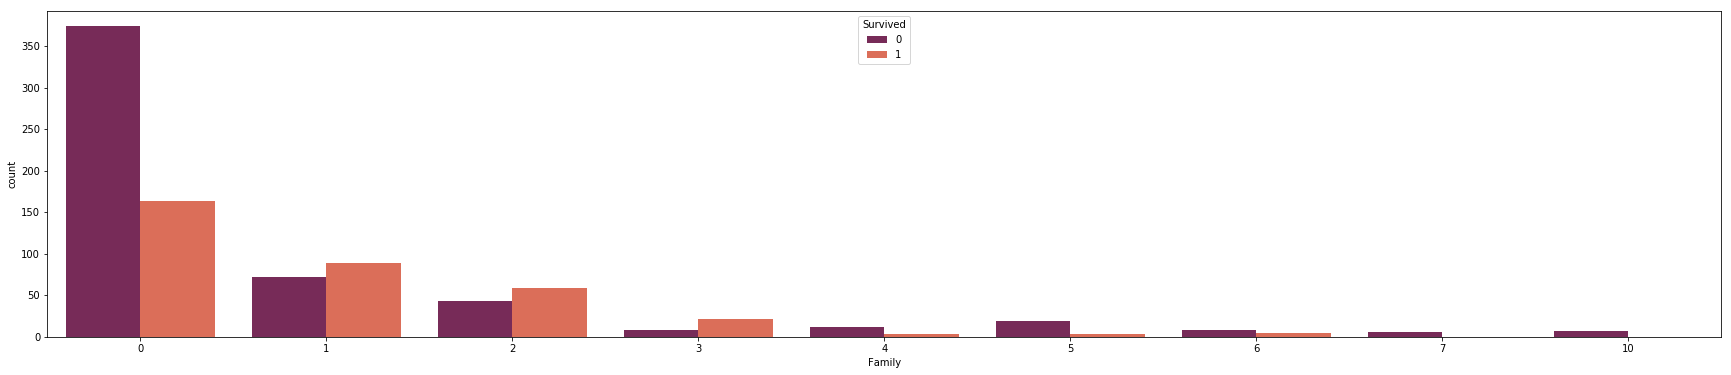

In [77]:
#Relation of family with the survival rate
df['Family']=df['SibSp']+df['Parch']
fig, axis = plt.subplots(1,1,figsize=(30,6))
sns.countplot(x='Family',hue='Survived',palette='rocket',data=df)

In [78]:
#Survival rate is higher for a person with a family than a person without it.

In [80]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)


In [81]:
df.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)
df = pd.concat([df,sex,embark],axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,male,Q,S
0,0,3,22.0,1,0,7.2500,1,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,1


In [ ]:
#Here Age and Fare are much higher in magnitude compared to others machine learning features. This can create problems as many machine learning models will get confused thinking Age and 
#Fare have higher weight than other features.Therefore, we need to do feature scaling to get a better result.

In [82]:
df['Fare'].mean()

32.2042079685746

In [83]:
df['Age'].mean()

28.368316498316496

In [84]:
df.std(axis=0,skipna=True)

Survived     0.486592
Pclass       0.836071
Age         13.274208
SibSp        1.102743
Parch        0.806057
Fare        49.693429
Family       1.613459
male         0.477990
Q            0.281141
S            0.447876
dtype: float64

In [85]:
df['Fare']=(df['Fare']-32.20)/49.69
df['Age']=(df['Age']-28.36)/13.274

In [86]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,male,Q,S
0,0,3,-0.479132,1,0,-0.502113,1,1,0,1
1,1,1,0.726232,1,0,0.786543,1,0,0,0
2,1,3,-0.177791,0,0,-0.488529,0,0,0,1
3,1,1,0.500226,1,0,0.420608,1,0,0,1
4,0,3,0.500226,0,0,-0.486013,0,1,0,1


In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.30, 
                                                    random_state=101)

In [88]:
#TRAINING AND PREDICTING
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
predictions = logmodel.predict(X_test)

G:\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [89]:
#EVALUATION
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       154
           1       0.80      0.65      0.71       114

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268

